In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append("..")

from opdynamics.utils.reading_tools import param_to_hash
from opdynamics.simulation.utils import get_param_tuple
from opdynamics.utils.reading_tools import (parse_experiment_params,
                                            make_tuple,
                                            get_runs_paths)
from opdynamics.utils.results_tools import get_experiment_mean_data
from opdynamics.utils.plotting.formatting import (classical_structure,
                                                  format_text)

In [3]:
params = parse_experiment_params("../experiments_params/large_graph_no_polarized_group_kappa_0_15_25_gamma_5_0_5.json")
results = get_experiment_mean_data(params, "../results/large_graph_no_polarized_group_kappa_0_15_25_gamma_5_0_5/")

In [7]:

import json

from opdynamics.simulation.utils import build_param_list
from opdynamics.model.statistics import error_curve

experiment_params = json.load(open("../experiments_params/large_graph_no_polarized_group_kappa_0_15_25_gamma_5_0_5.json", "r"))
experiment_params = build_param_list(experiment_params)

In [19]:
experiment_params[0]

{'simulation_parameters': {'graph_type': 'barabasi',
  'network_size': 3000,
  'memory_size': 256,
  'code_length': 5,
  'kappa': 0,
  'lambd': 0,
  'alpha': 0,
  'omega': 0,
  'gamma': -5,
  'preferential_attachment': 2,
  'polarization_type': 0},
 'general_parameters': {'T': 10000,
  'num_repetitions': 100,
  'early_stop': True,
  'epsilon': 1e-08,
  'results_path': 'results/large_graph_no_polarized_group_kappa_0_15_25_gamma_5_0_5/'}}

In [8]:
param_to_hash(get_param_tuple([x for x in experiment_params if x["simulation_parameters"]["gamma"] == 5 and x["simulation_parameters"]["kappa"] == 25][0]))

'd7a8e04a4bbb5c2f1ac2aef8ef65f0d79a8b06879a59494f4841a9106e3edc16'

In [13]:
from pathlib import Path

In [14]:
error_curve(Path("../results/large_graph_no_polarized_group_kappa_0_15_25_gamma_5_0_5/d7a8e04a4bbb5c2f1ac2aef8ef65f0d79a8b06879a59494f4841a9106e3edc16"), 10000)

['run_98_stats.pkl', 'run_61_stats.pkl', 'run_62_stats.pkl', 'run_55_stats.pkl', 'run_81_stats.pkl', 'run_87_stats.pkl', 'run_45_stats.pkl', 'run_86_stats.pkl', 'run_8_stats.pkl', 'run_104_stats.pkl', 'run_3_stats.pkl', 'run_54_stats.pkl', 'run_32_stats.pkl', 'run_28_stats.pkl', 'run_35_stats.pkl', 'run_70_stats.pkl', 'run_93_stats.pkl', 'run_38_stats.pkl', 'run_80_stats.pkl', 'run_51_stats.pkl', 'run_95_stats.pkl', 'run_37_stats.pkl', 'run_13_stats.pkl', 'run_107_stats.pkl', 'run_102_stats.pkl', 'run_26_stats.pkl', 'run_67_stats.pkl', 'run_34_stats.pkl', 'run_24_stats.pkl', 'run_4_stats.pkl', 'run_92_stats.pkl', 'run_33_stats.pkl', 'run_100_stats.pkl', 'run_22_stats.pkl', 'run_39_stats.pkl', 'run_115_stats.pkl', 'run_17_stats.pkl', 'run_29_stats.pkl', 'run_44_stats.pkl', 'run_96_stats.pkl', 'run_46_stats.pkl', 'run_82_stats.pkl', 'run_110_stats.pkl', 'run_68_stats.pkl', 'run_64_stats.pkl', 'run_112_stats.pkl', 'run_41_stats.pkl', 'run_0_stats.pkl', 'run_21_stats.pkl', 'run_79_stats.pk

{'entropy': [np.float64(7.373800265728442),
  np.float64(0.07582987901407587),
  np.float64(0.008425542112675098),
  np.float64(0.0012344808532575924),
  np.float64(0.0002861003881781547),
  np.float64(0.004716528203126312),
  np.float64(0.00041081347310644665),
  np.float64(0.002023638320368745),
  np.float64(0.0015222366274252454),
  np.float64(0.0003520307012704133),
  np.float64(0.00014711820685902203),
  np.float64(0.0001021654214298763),
  np.float64(0.00023700361013174277),
  np.float64(0.0005228701764753961),
  np.float64(8.91984563925892e-05),
  np.float64(0.00014327639743639734),
  np.float64(8.404179662946127e-05),
  np.float64(6.846498168985773e-05),
  np.float64(2.9520205528003916e-05),
  np.float64(0.0005408779137181558),
  np.float64(5.628181571775837e-05),
  np.float64(0.0004119969034484024),
  np.float64(3.410937252725368e-05),
  np.float64(0.00014403567513988853),
  np.float64(3.030843595093483e-05),
  np.float64(0.00010439513581608028),
  np.float64(8.950200258580268

In [15]:
Y = [np.float64(7.373800265728442),
  np.float64(0.07582987901407587),
  np.float64(0.008425542112675098),
  np.float64(0.0012344808532575924),
  np.float64(0.0002861003881781547),
  np.float64(0.004716528203126312),
  np.float64(0.00041081347310644665),
  np.float64(0.002023638320368745),
  np.float64(0.0015222366274252454),
  np.float64(0.0003520307012704133),
  np.float64(0.00014711820685902203),
  np.float64(0.0001021654214298763),
  np.float64(0.00023700361013174277),
  np.float64(0.0005228701764753961),
  np.float64(8.91984563925892e-05),
  np.float64(0.00014327639743639734),
  np.float64(8.404179662946127e-05),
  np.float64(6.846498168985773e-05),
  np.float64(2.9520205528003916e-05),
  np.float64(0.0005408779137181558),
  np.float64(5.628181571775837e-05),
  np.float64(0.0004119969034484024),
  np.float64(3.410937252725368e-05),
  np.float64(0.00014403567513988853),
  np.float64(3.030843595093483e-05),
  np.float64(0.00010439513581608028),
  np.float64(8.950200258580268e-05),
  np.float64(0.0001711361537143399),
  np.float64(0.00012737306029543741),
  np.float64(0.0001109560880795811),
  np.float64(2.8878380994499198e-05),
  np.float64(2.5381389545946566e-05),
  np.float64(1.5720824952034173e-05),
  np.float64(0.00016953089450895403),
  np.float64(7.72346484532985e-05),
  np.float64(1.7256795314977455e-05),
  np.float64(1.2972589398700538e-05),
  np.float64(5.9032306225022824e-05),
  np.float64(1.0843901517472779e-05),
  np.float64(9.25411549048793e-05),
  np.float64(9.498552730971086e-06),
  np.float64(6.884771140117419e-06),
  np.float64(8.089465299767928e-06),
  np.float64(2.1294609283450176e-05),
  np.float64(3.167615662395598e-05),
  np.float64(7.679254259148663e-06),
  np.float64(7.03960609994384e-06),
  np.float64(6.465193796649836e-06),
  np.float64(7.141941141024479e-06),
  np.float64(3.546656554552077e-05),
  np.float64(9.856063776333268e-06),
  np.float64(1.3466766280266209e-05),
  np.float64(6.967865556012386e-05),
  np.float64(5.572194941384754e-06),
  np.float64(1.3561040429934661e-05),
  np.float64(5.985126070893173e-05),
  np.float64(2.773651405103023e-05),
  np.float64(7.8036798635571e-06),
  np.float64(1.1420680975056779e-05),
  np.float64(2.1116555487622262e-05),
  np.float64(2.5708785846181648e-05),
  np.float64(4.12021786269937e-06),
  np.float64(3.862769127514303e-06),
  np.float64(1.0136185261249959e-05),
  np.float64(6.488470729513544e-06),
  np.float64(3.54498617725301e-06),
  np.float64(4.2532147817676446e-05),
  np.float64(2.0144269859158232e-05),
  np.float64(1.8351576195067215e-05),
  np.float64(1.7317895576732803e-05),
  np.float64(1.6355981122956755e-05),
  np.float64(6.8642870321723475e-06),
  np.float64(3.656320307405344e-05),
  np.float64(3.4613521682960735e-05),
  np.float64(1.4575933847449194e-05),
  np.float64(3.165509200456469e-05),
  np.float64(3.189419034233844e-06),
  np.float64(6.944981060948451e-06),
  np.float64(2.3794532235718463e-05),
  np.float64(6.237006171742311e-06),
  np.float64(1.3966688346159706e-05),
  np.float64(2.2934127042300023e-06),
  np.float64(2.7182329655779892e-05),
  np.float64(1.1143607912912441e-05),
  np.float64(5.364504303893986e-06),
  np.float64(3.569056237870752e-06),
  np.float64(5.257054223473917e-06),
  np.float64(1.206470108722989e-05),
  np.float64(2.3405939572520522e-05),
  np.float64(1.8350841159059535e-06),
  np.float64(1.7553074848558226e-06),
  np.float64(4.784737186409607e-06),
  np.float64(7.135271203985022e-06),
  np.float64(2.846381875774087e-06),
  np.float64(1.624316013818457e-05),
  np.float64(1.0073931100456995e-05),
  np.float64(2.536373972958288e-06),
  np.float64(9.44203776179133e-06),
  np.float64(8.096284958089955e-06),
  np.float64(6.058724334313779e-06),
  np.float64(2.389450422274513e-06),
  np.float64(1.3874092285151784e-06),
  np.float64(1.3340523649809898e-06),
  np.float64(1.4933652275321602e-06),
  np.float64(7.878824968115137e-06),
  np.float64(1.2744372444004066e-05),
  np.float64(3.419968746844882e-06),
  np.float64(3.294476066490814e-06),
  np.float64(5.292063061257813e-06),
  np.float64(7.4557365570923825e-06),
  np.float64(5.05089414009865e-06),
  np.float64(4.872115680420439e-06),
  np.float64(1.2991718882260992e-06),
  np.float64(1.2539867779246125e-06),
  np.float64(1.7727993750300135e-06),
  np.float64(1.0470548631229837e-05),
  np.float64(1.0419137163417739e-05),
  np.float64(1.0905077588461727e-06),
  np.float64(1.0541600671453425e-06),
  np.float64(4.137785067808321e-06)]

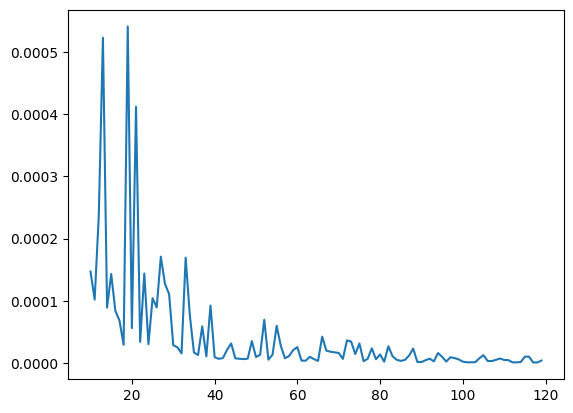

In [19]:
plt.plot(np.arange(len(Y))[10:], Y[10:])

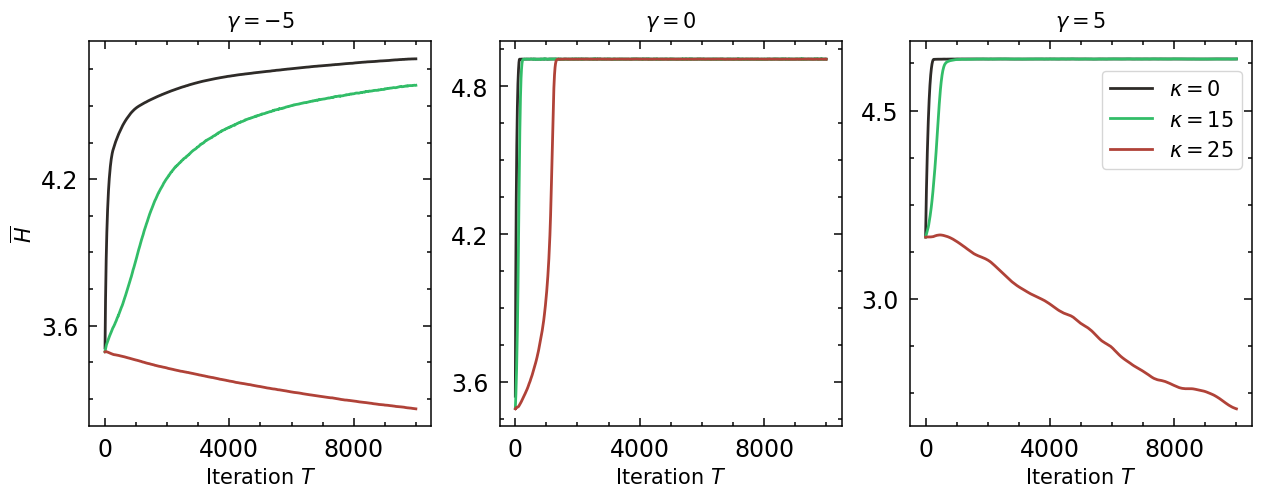

In [6]:
# parameters

nrows = 1
ncols = 3

titles = [rf"$\gamma = {k}$" for k in [-5, 0, 5]]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"$\overline{H}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

# plot
line_width = 2

measure = 'entropy'

kappa_color = {
    0: "#2e2b28",
    15: "#32BD68",
    25: "#b04238"
}

X = np.arange(1, 10000 + 1)

selected_params = [x for x in params if x['gamma'] == -5]
for p in selected_params:
    axs[0].plot(X, results[make_tuple(p)][measure], c = kappa_color[p['kappa']], linewidth = line_width)

X = np.arange(1, 10000 + 1)

selected_params = [x for x in params if x['gamma'] == 0]
for p in selected_params:
    axs[1].plot(X, results[make_tuple(p)][measure], c = kappa_color[p['kappa']], linewidth = line_width)

X = np.arange(1, 10000 + 1)

selected_params = [x for x in params if x['gamma'] == 5]
for p in selected_params:
    if results[make_tuple(p)] is None:
        continue
    axs[2].plot(X, results[make_tuple(p)][measure], c = kappa_color[p['kappa']], linewidth = line_width, label = rf"$\kappa = {p['kappa']}$")
axs[2].legend(loc = 'upper right', fontsize = 15, bbox_to_anchor = (1, 0.95))